In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Libraries to define the working environment

In [ ]:
#Connecting to google drive storage to access files
from google.colab import drive
drive.mount('/content/gdrive')

#library to work with arrays, matrices, and other mathematical objects
import numpy as np

#library for data manipulation and analysis
import pandas as pd

# Tensorflow 2 and keras (to build and deploy machine learning and deep learning models)
import tensorflow as tf
from tensorflow import keras
import keras.backend as K

# To solve sequential data problems
from keras.models import Sequential, load_model
from keras.layers.core import Activation
from keras.layers import Dense, Dropout, LSTM

# sklearn functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

# lib for plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# accuracy and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score

# Randomseed setting for reproducibility
np.random.seed(1234)
PYTHONHASHSEED = 0

Mounted at /content/gdrive


#Loading the dataset
The dataset is made available by NASA Ames' Prognostics CoE. (https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6)

\ These are data collected during an engine degradation simulation, using the C-MAPSS simulator, acronym for "Commercial Modular Aero-Propulsion System Simulation", considered << high-fidelity system-level, designed to simulate nominal and engine failure degradation over a series of flights. >> The objective with which the dataset was created is to predict the remaining useful life (RUL) of each engine. RUL is the number of flights left to the engine after the last datapoint recorded in the test dataset. Each column is a different variable, the columns represent:

unit n umber
time, in cycles
operational setting 1
operational setting 2
operational setting 3
sensor measurement 1
sensor measurement 2
.
.
26 . sensor measurement 26

Below data are loaded:

FD001 Train
FD001 Test
FD001 RUL

In [ ]:
df_train = pd.read_csv("/content/gdrive/MyDrive/CMaps/train_FD001.txt", sep=" ", header=None)
df_test = pd.read_csv("/content/gdrive/MyDrive/CMaps/test_FD001.txt", sep=" ", header=None)
df_RUL = pd.read_csv("/content/gdrive/MyDrive/CMaps/RUL_FD001.txt", sep=" ", header=None)

train_copy = df_train
test_copy = df_test

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [ ]:
df_RUL.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


#Preprocessing
In this phase, the dataset is modified, let's say "cleaned" in order to make it more performant in the model training phase. Some parameters are first analyzed and certain information acquired, then, for example, unclassifiable data is eliminated, such as NaN (Not A Number), the columns are renamed for the labels, etc.

#Acquisition of dataset information
Before proceeding with the crucial preprocessing phase, it is important to acquire information about the structure and the elements.

In [ ]:
#print dimension of dataset
print("\n Train Dimension: ", df_train.shape)
print("\n Test Dimension: ", df_test.shape)
print("\n RUL Dimension: ", df_RUL.shape)


 Train Dimension:  (20631, 28)

 Test Dimension:  (13096, 28)

 RUL Dimension:  (100, 2)


In [ ]:
# Generic info with the describe function
print("\n info on Train data: \n", df_train.describe())
print("\n info on Test data: \n", df_test.describe())
print("\n info on RUL data: \n", df_RUL.describe())


 info on Train data: 
                  0             1             2             3        4   \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

             5             6             7             8             9   ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605  1.776400e-

In [ ]:
# Check the data types present
print("\n data types Train: \n",df_train.info())
print("\n data types Test: \n", df_test.info())
print("\n data types RUL: \n", df_RUL.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [ ]:
# Checking NaN values
print("\n no missing value Train: \n", df_train.isnull().sum().head(30))
print("\n no missing value Test: \n", df_test.isnull().sum().head(30))
print("\n no missing value Test: \n", df_RUL.isnull().sum().head(30))


 no missing value Train: 
 0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    20631
27    20631
dtype: int64

 no missing value Test: 
 0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    13096
27    13096
dtype: int64

 no missing value Test: 
 0      0
1    100
dtype: int64


#Changes made to the dataset

In [ ]:
# Removing columns with NaN value
df_train.drop(columns=[26,27], axis=1, inplace=True)
df_test.drop(columns=[26,27], axis=1, inplace=True)
df_RUL.drop(columns=[1], axis=1, inplace=True)

df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
df_train.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64')

In [ ]:
# Renaming of columns with labels
columns_train = ['unit_ID','time_in_cycles','setting_1', 'setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

df_train.columns = columns_train
df_test.columns = columns_train

df_train.columns

Index(['unit_ID', 'time_in_cycles', 'setting_1', 'setting_2', 'setting_3',
       'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr',
       'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd',
       'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')

In [ ]:
df_train.head()

,unit_ID,time_in_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


#Data Exploration

During the data exploration phase, data visualization techniques are used to analyze, represent, and interpret data in order to identify any patterns, trends, or anomalies that can be useful for making decisions or developing machine learning models.

##Number of cycles for single unit

Create a bar graph representing the maximum number of cycles for each unit in the training dataset.

<ipython-input-14-8559e70de238>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


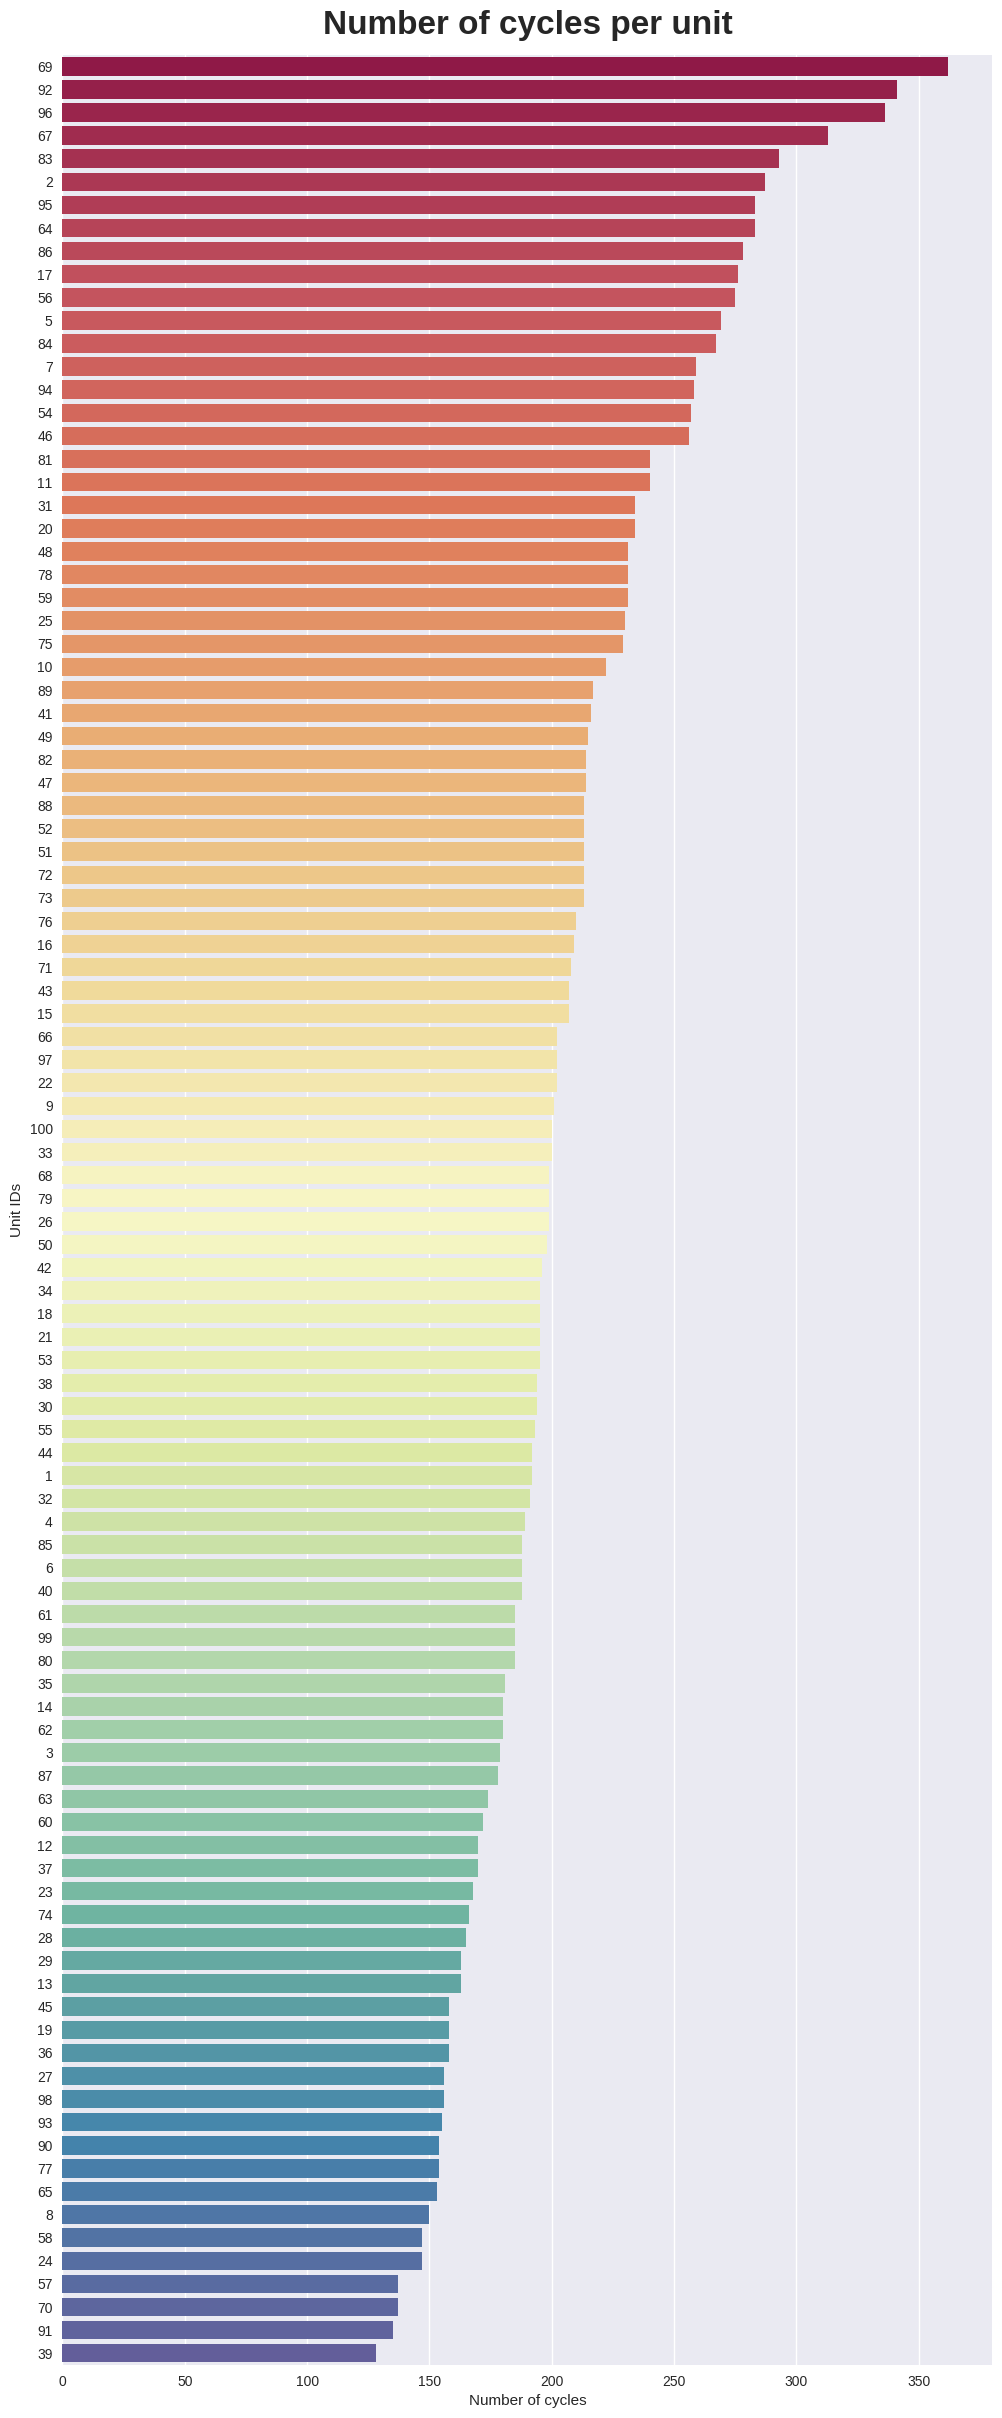

In [ ]:
cnt_train = df_train[["unit_ID", "time_in_cycles"]].groupby("unit_ID").max().sort_values(by="time_in_cycles", ascending=False)
cnt_ind = [str(i) for i in cnt_train.index.to_list()]
cnt_val = list(cnt_train.time_in_cycles.values)

plt.style.use("seaborn")
plt.figure(figsize=(12, 30))
sns.barplot(x=list(cnt_val), y=list(cnt_ind), palette='Spectral') #check castings
plt.xlabel('Number of cycles')
plt.ylabel('Unit IDs')
plt.title('Number of cycles per unit', fontweight='bold', fontsize=24, pad=15)

plt.show()

#Evaluation of the values of the individual sensors
Displaying standard deviation information for each column of the df_train dataframe in a bar graph format, which can be useful for understanding data variability and identifying any columns that may or may not be relevant to your analysis or modeling.

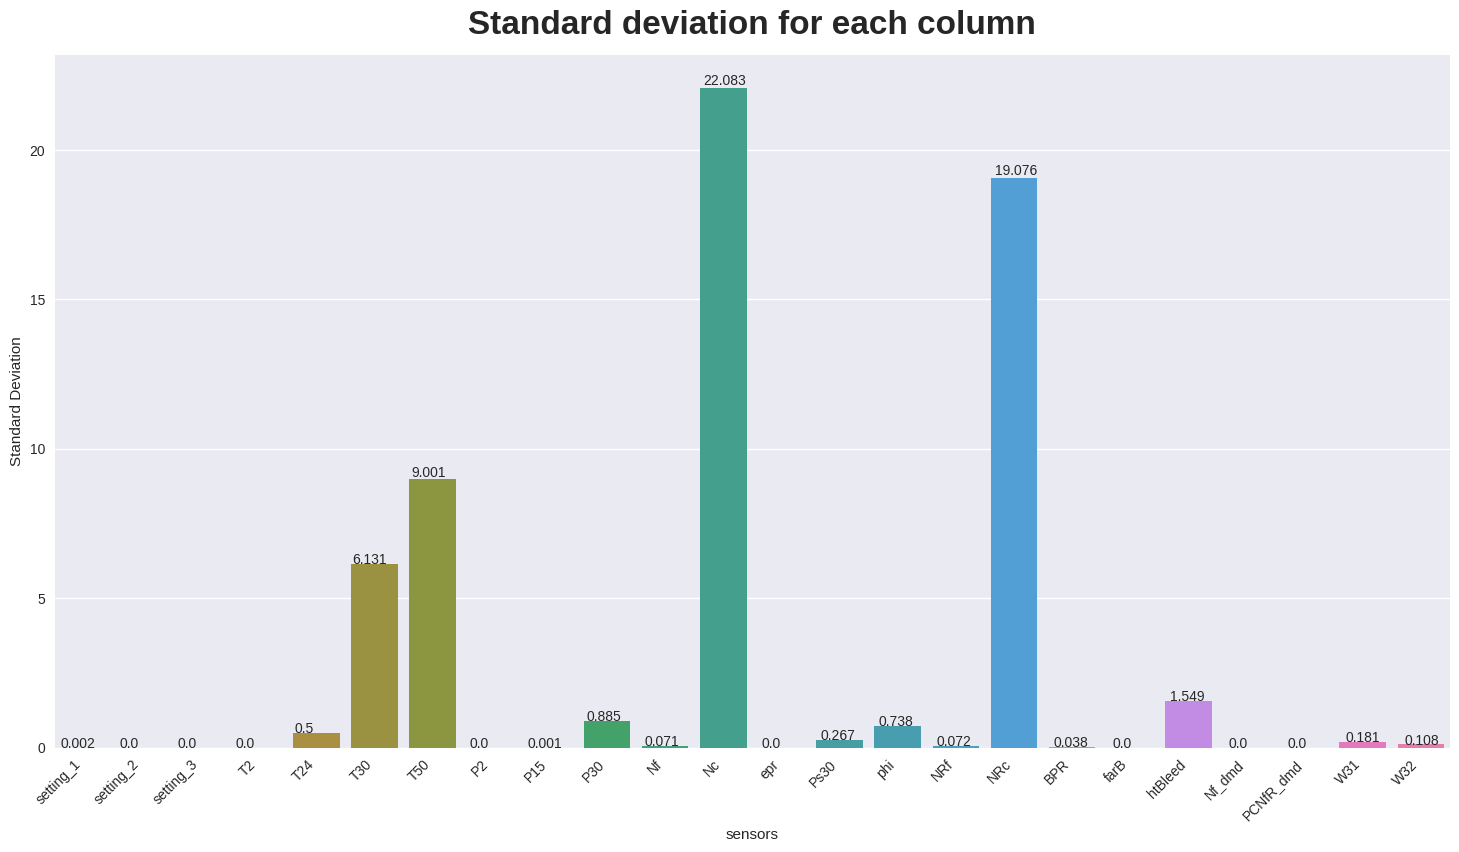

In [ ]:
plt.figure(figsize=(18, 9))
subset_stats = df_train.agg(['mean', 'std']).T[2:]
ax = sns.barplot(x=subset_stats.index, y="std", data=subset_stats, palette='husl')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("sensors")
ax.set_ylabel("Standard Deviation")
ax.set_title("Standard deviation for each column", fontweight='bold', fontsize=24, pad=15)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

The NC sensor with a standard deviation of 22.083 suggests that the values ​​of this variable are quite distant from the mean.



Removing sensors with std = 0 Following the calculation of the standard deviation, the columns whose calculated value is 0.0 are eliminated

In [ ]:
train = df_train.copy()
train.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','setting_3','farB','epr'],inplace=True)

#Correlation matrix
correlation is a measure that indicates the linear relationship between two random variables. It is always between -1 and 1, where:

-1 means that the two variables have an inverse linear relationship, i.e. as one increases, the other decreases.
1 means that the two variables have a direct linear relationship, i.e. as one increases, the other also increases.
0 means that it is not possible to establish a linear trend between the two variables.

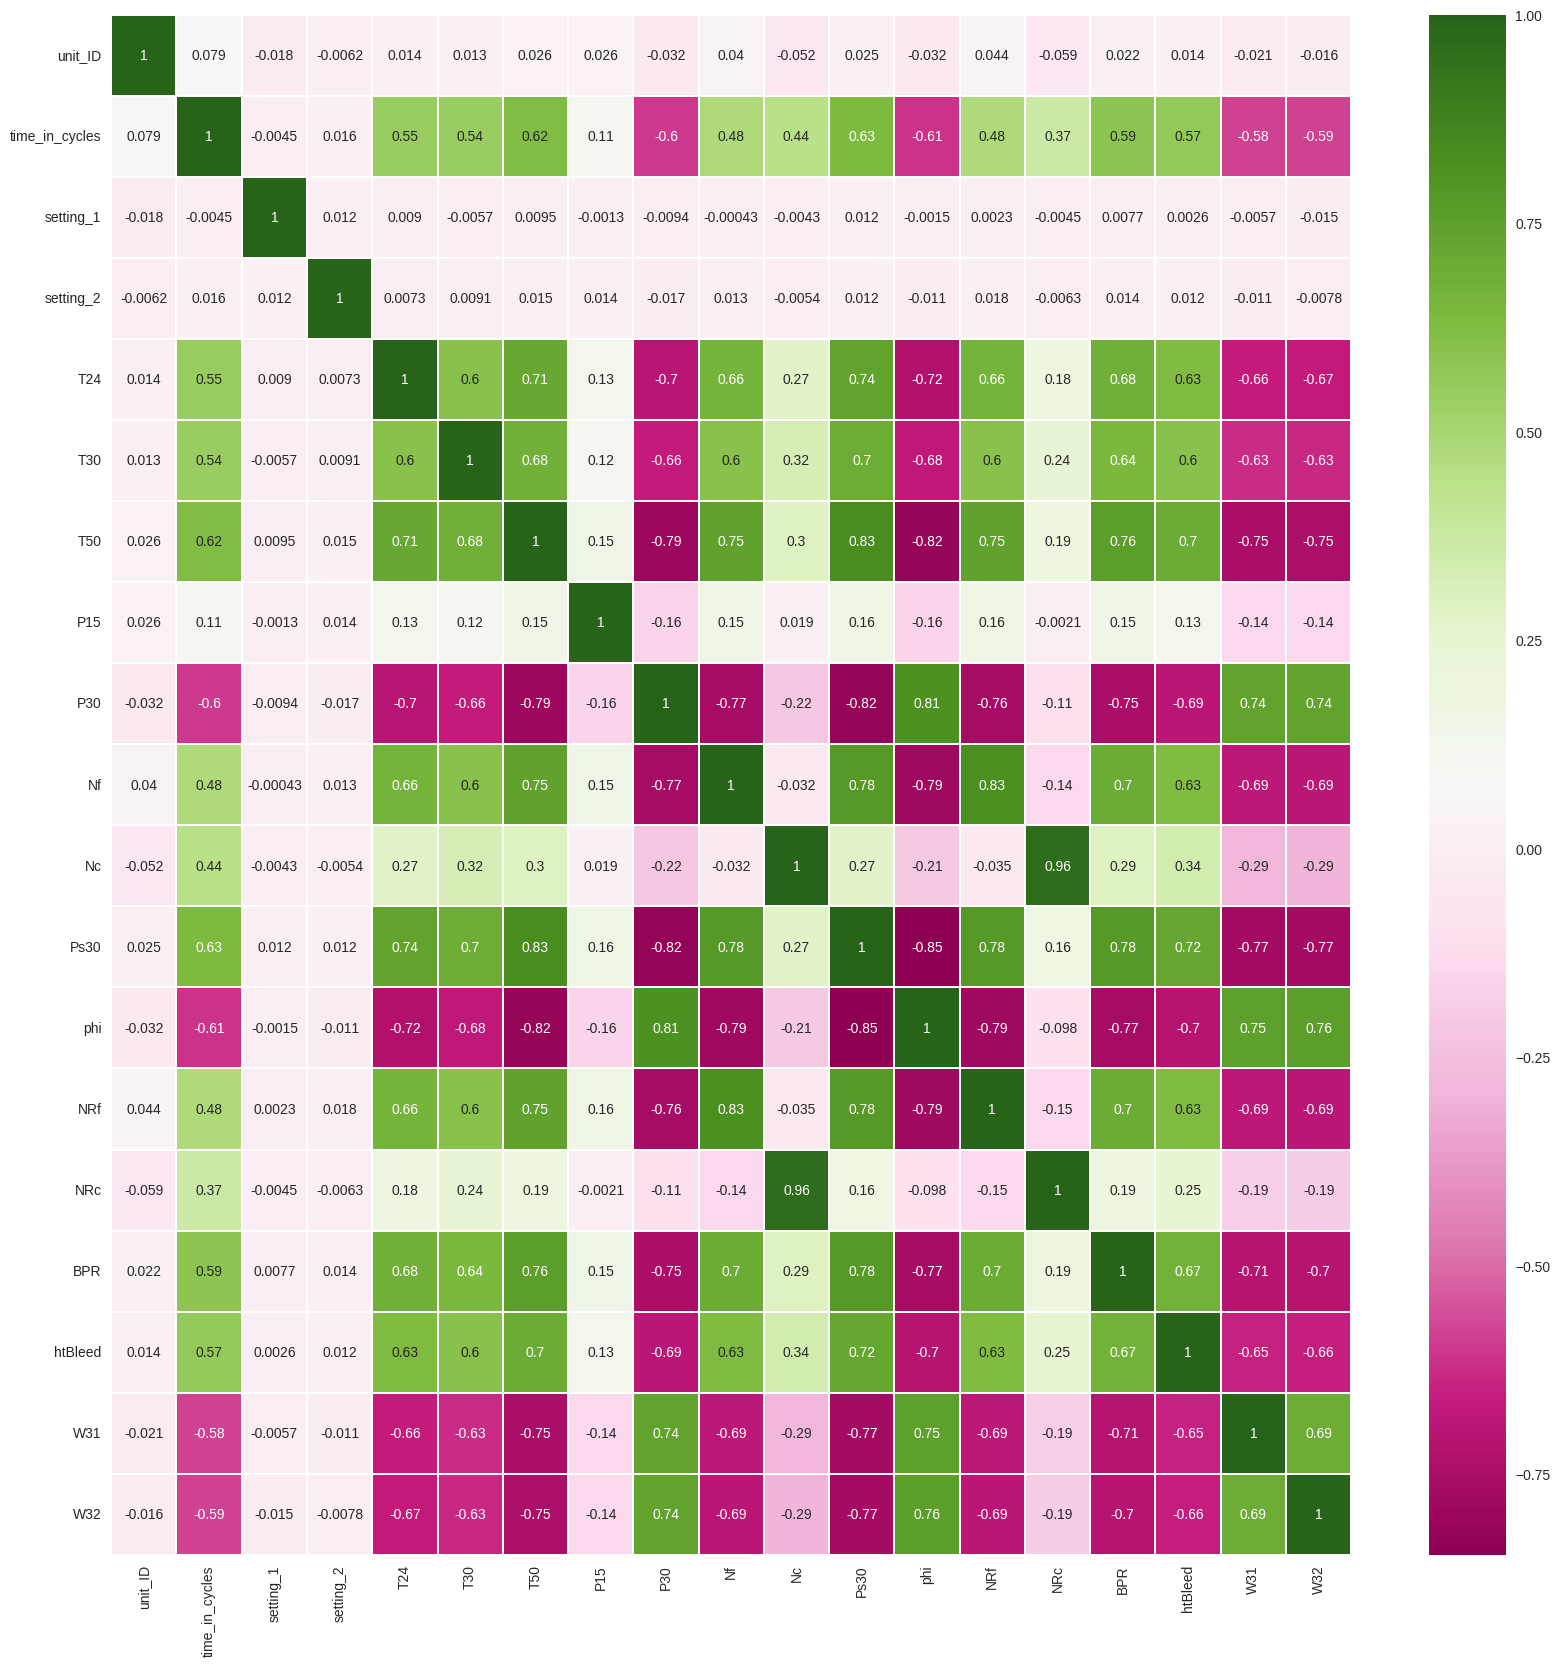

In [ ]:
cm = sns.heatmap(train.corr(), annot=True, cmap='PiYG', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [ ]:
df_train.to_csv('cmapss_csv.csv')

In [2]:
df_test.to_csv('cmap_test_csv.csv')

NameError: ignored

In [ ]:
df_RUL.to_csv('cmapss_csv.csv')

In [ ]:
df_train.head()

,unit_ID,time_in_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


#Model definition

#Data Labeling and Data Normalization
removed the issue of columns w0 and w1, I think he has a differently split dataset...

I also deleted the part where it assigns w0 and w1 to columns it calls 'label'

later I make an attempt to add these empty columns called label to see what happens

In [ ]:
#######
# TRAIN
#######
# Data Labeling - column generation RUL(Remaining Usefull Life)
rul = pd.DataFrame(df_train.groupby('unit_ID')['time_in_cycles'].max()).reset_index()
rul.columns = ['unit_ID', 'max']
df_train = df_train.merge(rul, on=['unit_ID'], how='left')
df_train['RUL'] = df_train['max'] - df_train['time_in_cycles']
df_train.drop('max', axis=1, inplace=True)

#  Normalization MinMax (from 0 to 1)
df_train['cycle_norm'] = df_train['time_in_cycles']
cols_normalize = df_train.columns.difference(['unit_ID','time_in_cycles','RUL'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(df_train[cols_normalize]),
                             columns=cols_normalize,
                             index=df_train.index)
join_df = df_train[df_train.columns.difference(cols_normalize)].join(norm_train_df)
df_train = join_df.reindex(columns = df_train.columns)

In [ ]:
df_train.columns

Index(['unit_ID', 'time_in_cycles', 'setting_1', 'setting_2', 'setting_3',
       'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr',
       'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd',
       'PCNfR_dmd', 'W31', 'W32', 'RUL', 'cycle_norm'],
      dtype='object')

In [ ]:
######
# TEST
######
# MinMax normalization (from 0 to 1)
df_test['cycle_norm'] = df_test['time_in_cycles']
cols_normalize_2 = df_test.columns.difference(['unit_ID','time_in_cycles','RUL'])
norm_test_df = pd.DataFrame(min_max_scaler.transform(df_test[cols_normalize_2]),
                            columns=cols_normalize_2,
                            index=df_test.index)
test_join_df = df_test[df_test.columns.difference(cols_normalize_2)].join(norm_test_df)
df_test = test_join_df.reindex(columns = df_test.columns)
df_test = df_test.reset_index(drop=True)

#### Import of real RUL data

In [ ]:
######
# REAL RUL
######
true_rul = pd.read_csv("/content/gdrive/MyDrive/CMaps/RUL_FD001.txt", sep = '\s+', header = None)


# We use the ground truth dataset to generate labels for the test data.
# generate column max for test data
rul = pd.DataFrame(df_test.groupby('unit_ID')['time_in_cycles'].max()).reset_index()
rul.columns = ['unit_ID', 'max']
true_rul.columns = ['more']
true_rul['unit_ID'] = true_rul.index + 1
true_rul['max'] = rul['max'] + true_rul['more']
true_rul.drop('more', axis=1, inplace=True)

# generate RUL for test data
df_test = df_test.merge(true_rul, on=['unit_ID'], how='left')
df_test['RUL'] = df_test['max'] - df_test['time_in_cycles']
df_test.drop('max', axis=1, inplace=True)

# # generate label columns w0 and w1 for test data
# df_test['label1'] = np.where(df_test['RUL'] <= w1, 1, 0 )
# df_test['label2'] = df_test['label1']
# df_test.loc[test_df['RUL'] <= w0, 'label2'] = 2

In [ ]:
true_rul.head(100)

,unit_ID,max
0,1,143
1,2,147
2,3,195
3,4,188
4,5,189
...,...,...
95,96,234
96,97,216
97,98,180
98,99,214


#definition of the dimensional parameters
sequence_length = 50

In [ ]:
#I add the columns label 1 and label 2 to the train and test
#I guess because I will put the new values there? who know

n_train = df_train.shape[0]
n_test = df_test.shape[0]
df_train = df_train.assign(label1=[None]*n_train, label2=[None]*n_train)
df_test = df_test.assign(label1=[None]*n_test, label2=[None]*n_test)

## def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # for one id I put all the rows in a single matrix
    data_matrix = id_df[seq_cols].values
    num_elements = data_matrix.shape[0]
    # Iterate over two lists in parallel.
    # For example id1 have 192 rows and sequence_length is equal to 50
    # so zip iterate over two following list of numbers (0,112),(50,192)
    # 0 50 -> from row 0 to row 50
    # 1 51 -> from row 1 to row 51
    # 2 52 -> from row 2 to row 52
    # ...
    # 111 191 -> from row 111 to 191
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

In [ ]:
# pick a large window size of 50 cycles
sequence_length = 50

def gen_sequence(id_df, seq_length, seq_cols):

    data_matrix = id_df[seq_cols].values
    num_elements = data_matrix.shape[0]

    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

In [ ]:
# pick the feature columns
sensor_cols = ['T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr',
       'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd',
       'PCNfR_dmd', 'W31', 'W32']
sequence_cols = ['setting_1', 'setting_2', 'setting_3', 'cycle_norm']
sequence_cols.extend(sensor_cols)

# TODO for debug
# val is a list of 192 - 50 = 142 bi-dimensional array (50 rows x 25 columns)
val=list(gen_sequence(df_train[df_train['unit_ID']==1], sequence_length, sequence_cols))
print(len(val))

# generator for the sequences
# transform each id of the train dataset in a sequence
seq_gen = (list(gen_sequence(df_train[df_train['unit_ID']==id], sequence_length, sequence_cols))
           for id in df_train['unit_ID'].unique())

# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
print(seq_array.shape)


142
(15631, 50, 25)


## function to generate labels
def gen_labels(id_df, seq_length, label):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # For one id I put all the labels in a single matrix.
    # For example:
    # [[1]
    # [4]
    # [1]
    # [5]
    # [9]
    # ...
    # [200]]
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    # I have to remove the first seq_length labels
    # because for one id the first sequence of seq_length size have as target
    # the last label (the previus ones are discarded).
    # All the next id's sequences will have associated step by step one label as target.
    return data_matrix[seq_length:num_elements, :]

In [ ]:
# function to generate labels
def gen_labels(id_df, seq_length, label):

    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]

    return data_matrix[seq_length:num_elements, :]

# generate labels
label_gen = [gen_labels(df_train[df_train['unit_ID']==id], sequence_length, ['RUL'])
             for id in df_train['unit_ID'].unique()]

label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(15631, 1)

# LSTM for the regression

In [ ]:
# define path to save model
model_path = 'regression_model.h5'

In [ ]:
def r2_keras(y_true, y_pred):
    """Coefficient of Determination
    """
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Next, we build a deep network.
# The first layer is an LSTM layer with 100 units followed by another LSTM layer with 50 units.
# Dropout is also applied after each LSTM layer to control overfitting.
# Final layer is a Dense output layer with single unit and linear activation since this is a regression problem.
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()
model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=30))
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(units=20))
model.add(Activation("relu"))
model.add(Dense(units=nb_out))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='nadam',metrics=['mae',r2_keras])

print(model.summary())

# fit the network
history = model.fit(seq_array, label_array, epochs=100, batch_size=50, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )

# list all data in history
print(history.history.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               50400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 30)                3030      
                                                                 
 activation (Activation)     (None, 30)                0         
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 activation_1 (Activation)   (None, 20)                0

## Add documentation on the MAE

what it is, how it is calculated and why
//
and also on the R^2

#Model Evaluation on Test set

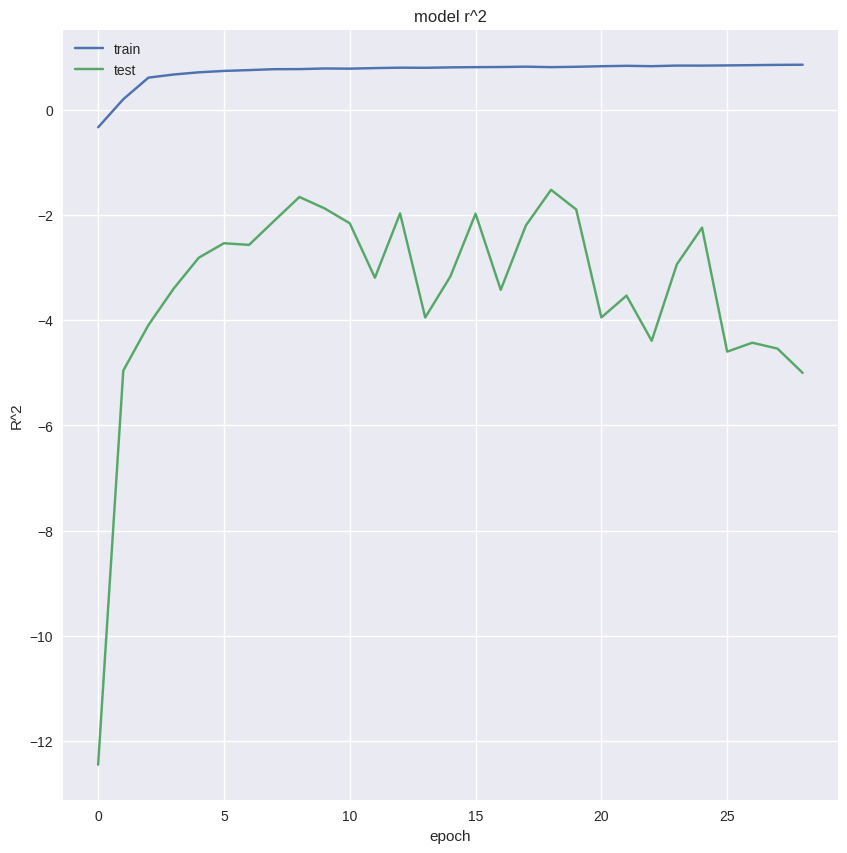

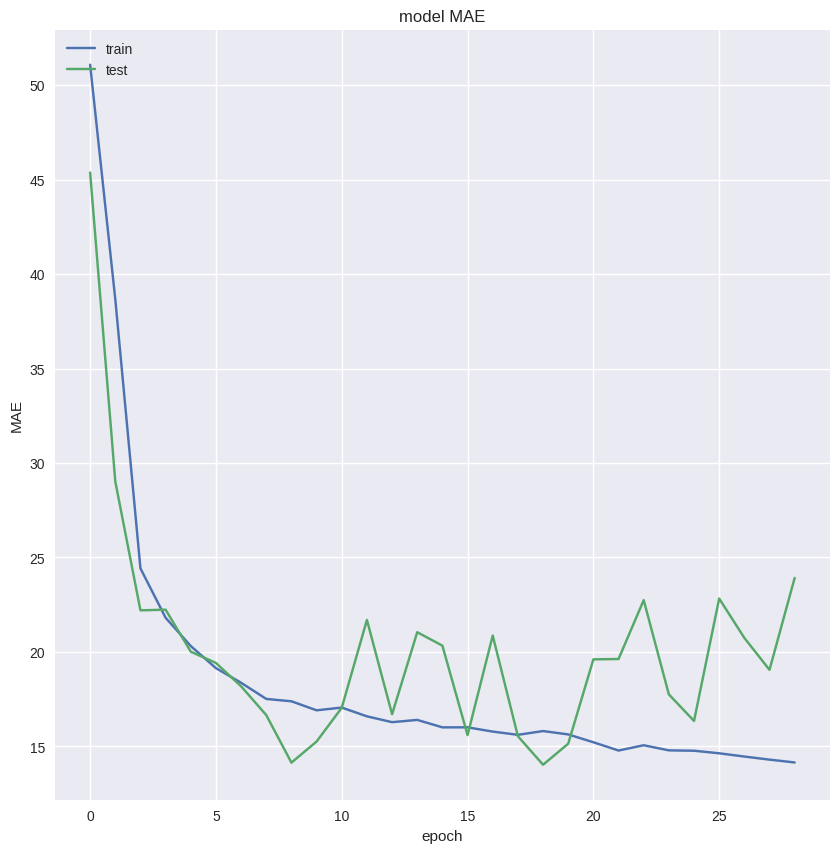

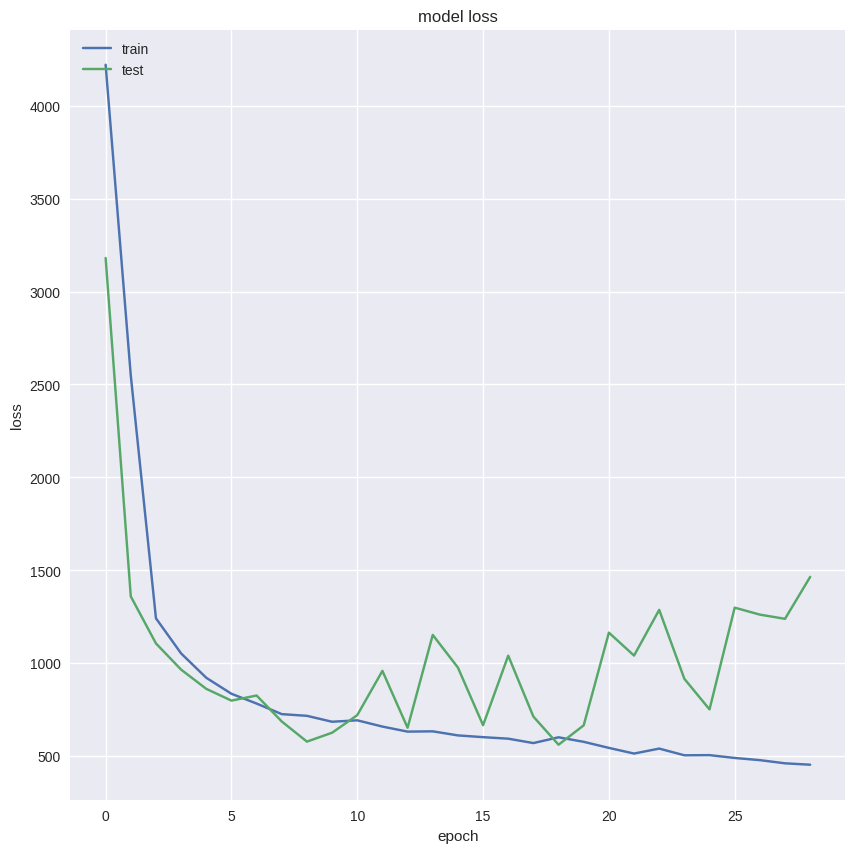

79/79 [==============================] - 0s 6ms/step - loss: 381.4661 - mae: 12.5258 - r2_keras: 0.8320

MAE: 12.525837898254395

R^2: 0.831963837146759
79/79 [==============================] - 1s 4ms/step


In [ ]:
# summarize history for R^2
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['r2_keras'])
plt.plot(history.history['val_r2_keras'])
plt.title('model r^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_r2.png")

# summarize history for MAE
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_mae.png")

# summarize history for Loss
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_regression_loss.png")

# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('\nMAE: {}'.format(scores[1]))
print('\nR^2: {}'.format(scores[2]))

y_pred = model.predict(seq_array,verbose=1, batch_size=200)
y_true = label_array

test_set = pd.DataFrame(y_pred)
test_set.to_csv('submit_train.csv', index = None)

# Evaluate on Validation set

3/3 - 0s - loss: 346.4319 - mae: 11.3732 - r2_keras: 0.7989 - 440ms/epoch - 147ms/step

MAE: 11.3732271194458

R^2: 0.7988565564155579
3/3 [==============================] - 0s 5ms/step


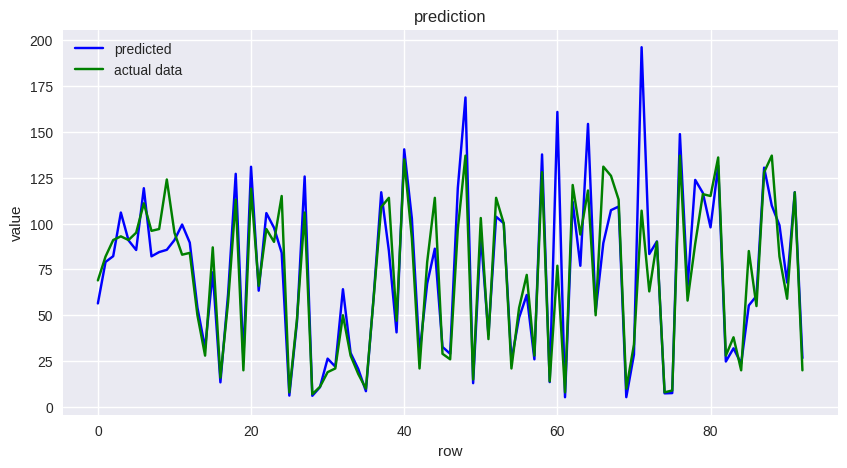

In [ ]:
import os
# We pick the last sequence for each id in the test data
seq_array_test_last = [df_test[df_test['unit_ID']==id][sequence_cols].values[-sequence_length:]
                       for id in df_test['unit_ID'].unique() if len(df_test[df_test['unit_ID']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
#print("seq_array_test_last")
#print(seq_array_test_last)
#print(seq_array_test_last.shape)

# Similarly, we pick the labels
#print("y_mask")
y_mask = [len(df_test[df_test['unit_ID']==id]) >= sequence_length for id in df_test['unit_ID'].unique()]
label_array_test_last = df_test.groupby('unit_ID')['RUL'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)
#print(label_array_test_last.shape)
#print("label_array_test_last")
#print(label_array_test_last)

# if best iteration's model was saved then load and use it
if os.path.isfile(model_path):
    estimator = load_model(model_path,custom_objects={'r2_keras': r2_keras})

    # test metrics
    scores_test = estimator.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
    print('\nMAE: {}'.format(scores_test[1]))
    print('\nR^2: {}'.format(scores_test[2]))

    y_pred_test = estimator.predict(seq_array_test_last)
    y_true_test = label_array_test_last

    test_set = pd.DataFrame(y_pred_test)
    test_set.to_csv('submit_test.csv', index = None)

    # Plot in blue color the predicted data and in green color the
    # actual data to verify visually the accuracy of the model.
    fig_verify = plt.figure(figsize=(10, 5))
    plt.plot(y_pred_test, color="blue")
    plt.plot(y_true_test, color="green")
    plt.title('prediction')
    plt.ylabel('value')
    plt.xlabel('row')
    plt.legend(['predicted', 'actual data'], loc='upper left')
    plt.show()
    fig_verify.savefig("model_regression_verify.png")